In [5]:
import sys
module_path = "/root/dacon"
sys.path.append(module_path)
import torch
device = "cuda"
from models.backboned_unet.unet import Unet
import yaml
import numpy as np
import torch
from models.super_resolution.models import edsr_baseline
import matplotlib.pyplot as plt
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2







torch.Size([1, 3, 224, 224])


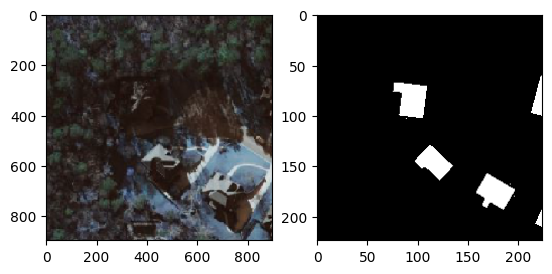

In [51]:


pre_process_model = edsr_baseline(4, True)

origin_image = cv2.imread('/root/dacon/inference/0001.png')
mask_image = cv2.imread('/root/dacon/inference/MASK_0001.png')
# print(image)
# plt.imshow(mask_image)


# image = torch.Tensor(origin_image) / 255
# image = image.permute(2,0,1).unsqueeze(0)
transform = A.Compose(
        [
            A.RandomCrop(224, 224),
            ToTensorV2(),
        ]
    )

transformed_image = transform(image=origin_image, mask=mask_image)
image, mask = transformed_image["image"], transformed_image["mask"]

fig = plt.figure()
print(image.unsqueeze(0).shape)
# print(image)
processed_image = pre_process_model(image.unsqueeze(0)/255)
fig.add_subplot(1, 2, 1)

plt.imshow(processed_image.squeeze(0).permute(1,2,0).detach().numpy())
fig.add_subplot(1, 2, 2)
plt.imshow(mask.numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3072, 3072, 3)


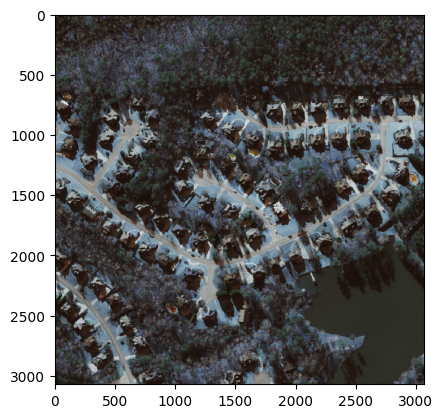

In [4]:
aaa = processed_image.squeeze(0).permute(1,2,0).detach().numpy()
print(aaa.shape)
plt.imshow(aaa)

In [44]:
model = Unet(backbone_name='resnet152', n_classes=1)
filename = "/root/dacon/models/ckpt/backboned_unet/checkpoint_resnet152_epoch604.pth"
state_dict = torch.load(filename)
state_dict.pop('mask_values', [0, 1])
model.load_state_dict(state_dict)
model.to(device).eval()


/root/miniconda3/envs/dacon/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/miniconda3/envs/dacon/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


upsample_blocks[0] in: 2048   out: 256
upsample_blocks[1] in: 256   out: 128
upsample_blocks[2] in: 128   out: 64
upsample_blocks[3] in: 64   out: 32
upsample_blocks[4] in: 32   out: 16


Unet(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0

In [52]:
processed_image = processed_image.to(device)

output_image = model(processed_image)

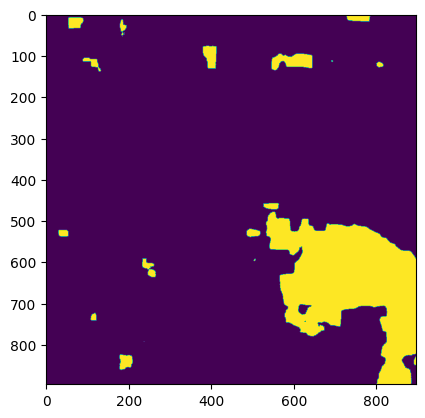

In [53]:
plt.imshow(output_image.cpu().detach().squeeze() > 0.5)